# Math 616 HW 3 - Set 1

### Comparison of Gradient Method with Nesterov's Accelerated Gradient Method

In [32]:
from numpy import *
from matplotlib import pyplot as plt
import scipy.linalg as la

def f(x):
    a = array([[1,1/2],[1/2,1]])
    b = array([1,-1])
    return x.dot(a.dot(x)) + b.dot(x)

def grad_f(x):
    a = array([[1,1/2],[1/2,1]])
    b = array([1,-1])
    return 2*a.dot(x) + b

# Gradient method
def gradient(max_gradf=1.0e-4, x0=[5.0,10.0], t=0.1):
    fs = []
    xk = array(x0)
    gfk = grad_f(xk)
    gfk_n2 = la.norm(gfk)
    while gfk_n2 > max_gradf:
        gfk = grad_f(xk)
        gfk_n2 = la.norm(gfk)
        xk -= t*gfk
        fk = f(xk)   # storing the function values for plot
        fs.append(fk)
    return array(fs), xk

# Nesterov method
def nesterov(max_gradf=1.0e-4, x0=[5.0,10.0], t=0.1):
    fs = []
    xk = array(x0)
    yk = xk
    gfk = grad_f(xk)
    gfk_n2 = la.norm(gfk)
    tk = 1
    k = 1
    while gfk_n2 > max_gradf:
        gfk = grad_f(yk)
        xk1 = yk - t*gfk
        tk1 = (1.0 + sqrt(1.0 + 4.0*tk*tk))/2.0
        g = (tk-1)/tk1
        yk = xk1 + g*(xk1 - xk)
        fk = f(xk)   # storing the function values for plot
        fs.append(fk)
        tk = tk1
        xk = xk1
        gfk_n2 = la.norm(gfk)
        k+=1
    return array(fs), xk

# Compute convergence rates
def conv_rate(alg, limit):
    fs, x = alg()
    rs = (fs[1:]-limit)/(fs[:-1]-limit)
    plt.plot(rs)
    plt.title("Convergence Rate for '{}'".format(alg.__name__.title()))
    plt.show()
    return rs

In [37]:
# Get the y values and solution using the gradient method
fsg, xkg = gradient()
plt.plot(fsg)
plt.title("Function values For Gradient Method")
plt.subtitle("Max Gradient < 1.0E-4")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

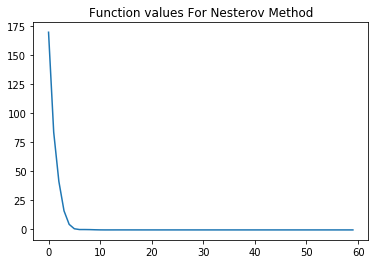

In [34]:
# Get the y values and solution using the gradient method
fsn, xkn = nesterov()
plt.plot(fsn)
plt.title("Function values For Nesterov Method")
plt.show()

We see that, as expected, the convergence rate of the gradient algorithm is linear with convergence rate 0.81

96 steps to converge


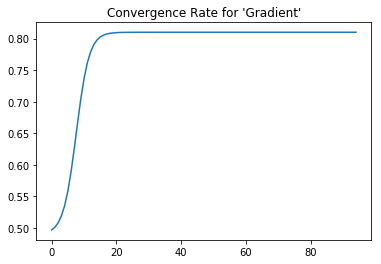

array([ 0.49690096,  0.50124928,  0.50817841,  0.51897508,  0.5352234 ,
        0.55844049,  0.58927073,  0.6264556 ,  0.66643555,  0.70444354,
        0.73657656,  0.76115581,  0.77855617,  0.79021019,  0.79772857,
        0.80246235,  0.80539736,  0.80719977,  0.80830016,  0.80896954,
        0.80937584,  0.80962213,  0.80977131,  0.80986162,  0.80991627,
        0.80994934,  0.80996935,  0.80998146,  0.80998878,  0.80999322,
        0.8099959 ,  0.80999752,  0.8099985 ,  0.80999909,  0.80999945,
        0.80999967,  0.8099998 ,  0.80999988,  0.80999993,  0.80999996,
        0.80999997,  0.80999998,  0.80999999,  0.80999999,  0.81      ,
        0.81      ,  0.81      ,  0.81      ,  0.81      ,  0.81      ,
        0.81      ,  0.81      ,  0.81      ,  0.81      ,  0.81      ,
        0.81      ,  0.81      ,  0.81      ,  0.81      ,  0.81      ,
        0.81      ,  0.81      ,  0.81      ,  0.81      ,  0.81      ,
        0.81      ,  0.81      ,  0.81      ,  0.81      ,  0.81

In [35]:
print("{} steps to converge".format(len(fsg)))
conv_rate(gradient, -1)

The Convergence Rate of the Nesterov algorithm does not stabilize, but the algorithm converges faster

60 steps to converge


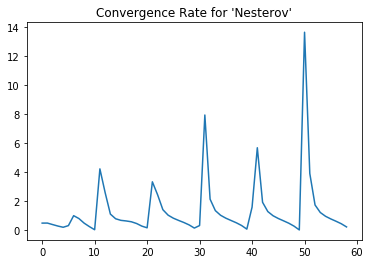

array([  0.49421053,   0.49690096,   0.39221134,   0.2909137 ,
         0.20740341,   0.32070919,   1.00785124,   0.8095745 ,
         0.4913095 ,   0.25217111,   0.03723599,   4.23845882,
         2.59856149,   1.1161091 ,   0.79441976,   0.68479569,
         0.64374137,   0.58634258,   0.4658813 ,   0.28541932,
         0.16951085,   3.34544421,   2.44775833,   1.42082747,
         1.04294255,   0.83376409,   0.67997624,   0.53621969,
         0.37055196,   0.15200652,   0.32700927,   7.95699523,
         2.14635021,   1.35685007,   1.03472535,   0.83477434,
         0.6743682 ,   0.5165363 ,   0.32924057,   0.07914636,
         1.59785553,   5.69768182,   1.93127692,   1.29120454,
         1.00241824,   0.81184079,   0.65142852,   0.48676387,
         0.28383663,   0.02434206,  13.67115158,   3.92046299,
         1.74607028,   1.22607947,   0.9656184 ,   0.78311057,
         0.62232369,   0.45033594,   0.23074866])

In [36]:
print("{} steps to converge".format(len(fsn)))
conv_rate(nesterov,-1)